


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 the_input (InputLayer)      [(None, 100, 300)]           0         []                            
                                                                                                  
 lambda (Lambda)             (None, 100, 300, 1)          0         ['the_input[0][0]']           
                                                                                                  
 conv1 (Conv2D)              (None, 100, 300, 16)         160       ['lambda[0][0]']              
                                                                                                  
 pool1 (MaxPooling2D)        (None, 50, 150, 16)          0         ['conv1[0][0]']               
                                                                                           

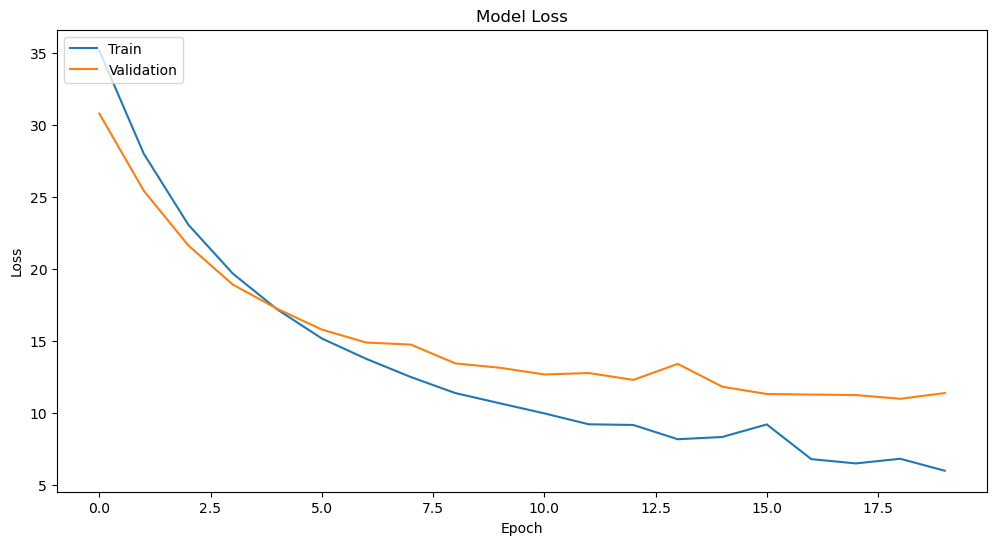

2/2 [==============================] - 0s 139ms/step
Incorrect: True word = ['aaA', 'waA', 'taB', 'yaM', 'keE'] , Decoded word = shBayMllLaaElaA
Incorrect: True word = ['naB', 'kaMllL', '-'] , Decoded word = aaAlaBshMfaMmaA
Incorrect: True word = ['baB', 'waE', 'ghB', 'raE', 'aaA', 'raA', 'teA'] , Decoded word = taBaaEnaBbaBnaEthBaaEraE
Incorrect: True word = ['seB', 'yaM', 'daE', 'yaA', 'maB', 'toM', 'yaM', 'raE'] , Decoded word = aaAlaBkeMnaMaaEyaBnaE
Incorrect: True word = ['maB', 'yaM', 'daE', 'waA', 'naA'] , Decoded word = naBraEkeBlaA
Incorrect: True word = ['aaA', 'laB', 'zaE', 'heB', 'raE', 'aaA', 'hhA', 'taB', 'toM', 'aaE', 'waA', 'yaB', 'naE'] , Decoded word = keBkeMraEeeA
Incorrect: True word = ['shB', 'taM', 'aaE', 'waA', 'teA', 'saB', 'haM', '-', 'aaA', 'waA', 'yaA'] , Decoded word = aaAlaBmaMraEsaA
Incorrect: True word = ['raA', 'baB', 'aaE', 'yaB', 'ayE', 'seB', 'yaM', 'daE', 'yaA', 'zaB', 'aaE', 'heB', 'raE'] , Decoded word = aaAlaBkeMteE
Incorrect: True word = ['haB', 

2/2 [==============================] - 0s 145ms/step
Incorrect: True word = ['aaA', 'waA', 'taB', 'yaM', 'keE'] , Decoded word = aaAyaMwaEhaMlaBraEteE
Incorrect: True word = ['naB', 'kaMllL', '-'] , Decoded word = zaAhaMlaBbaMaaEhaMlaBbaMaaEteE
Incorrect: True word = ['baB', 'waE', 'ghB', 'raE', 'aaA', 'raA', 'teA'] , Decoded word = baBkhMlaBshMllLaaEraEteAaaAlaBwaEbaByaMllLteE
Incorrect: True word = ['seB', 'yaM', 'daE', 'yaA', 'maB', 'toM', 'yaM', 'raE'] , Decoded word = taBkhMlaBmaMwaEaaAkaBbaMaaElaMteE
Incorrect: True word = ['maB', 'yaM', 'daE', 'waA', 'naA'] , Decoded word = zaAnaMraEaaAbaMraEyaMteA
Incorrect: True word = ['aaA', 'laB', 'zaE', 'heB', 'raE', 'aaA', 'hhA', 'taB', 'toM', 'aaE', 'waA', 'yaB', 'naE'] , Decoded word = baBhaMlaByaMwaEteE
Incorrect: True word = ['shB', 'taM', 'aaE', 'waA', 'teA', 'saB', 'haM', '-', 'aaA', 'waA', 'yaA'] , Decoded word = taBalMtoMllLwaEaaAhaMlaBkaMtoMllL
Incorrect: True word = ['raA', 'baB', 'aaE', 'yaB', 'ayE', 'seB', 'yaM', 'daE', 'yaA',

In [1]:
%run functions_nb.ipynb
%run main_nb.ipynb



In [2]:
true = r'C:\Users\HP\Desktop\CODES\ifnenit_v2.0p1e\ifnenit_v2.0p1e\data\tru\ae07_001.tru'
racine_gt = r"C:\Users\HP\Desktop\CODES\ifnenit_v2.0p1e\ifnenit_v2.0p1e\data\set_a\tru"

def get_Word(name):
    file_name = name.split("\\")[-1].split(".")[0]
    path_gt = racine_gt + "\\" + file_name + ".tru"
    with open(path_gt, "r") as load_profile:
        label = load_profile.read().splitlines()[6]
    word = label.split(":")[-3].split(";")[0].split("|")[:-1]
    return ''.join(word)

real = get_Word(true)
print(real)


aaAlaBshMraEaaAyaBayE


## Best path decoding

In [3]:
import numpy as np
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import tensorflow.keras.backend as K

def preprocess_image(image_path, img_size=(100, 300)):
    img = cv2.imread(image_path, 0)
    img = cv2.resize(img, (img_size[1], img_size[0]), interpolation=cv2.INTER_LANCZOS4)
    img = cv2.threshold(img, 255 // 2, 255, cv2.THRESH_BINARY)[1]
    img = cv2.bitwise_not(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def decode_prediction(pred, chars):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    decoded = K.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
    decoded_texts = []
    for d in decoded:
        decoded_texts.append(''.join([chars[char] for char in d.numpy() if char != -1]))
    return decoded_texts

# Create the inference model
input_data = Input(name='the_input', shape=(img_h, img_w), dtype='float32')
y_pred = model.get_layer('softmax').output

inference_model = Model(inputs=model.input[0], outputs=y_pred)

# Example usage
image_path = r'C:\Users\HP\Desktop\CODES\ifnenit_v2.0p1e\ifnenit_v2.0p1e\data\set_a\tif\ae07_001.tif'
preprocessed_image = preprocess_image(image_path)
prediction = inference_model.predict(preprocessed_image)

decoded_texts = decode_prediction(prediction, inve_classes)
print('Predicted Text:', decoded_texts[0])


1/1 [==============================] - 1s 726ms/step
Predicted Text: aaAlaBshMayA


In [4]:
inv_classes = {
    'shB': 'ش', 'taM': 'ت', 'aaE': 'ع', 'waA': 'و', 'teA': 'ط', 'saB': 'ص', 'haM': 'ح', 'raE': 'ر',
    'aaA': 'ا', 'yaA': 'ي', 'maB': 'م', 'toB': 'ت', 'raA': 'ر', 'yaB': 'ي', 'deA': 'د', 'aeElaB': 'ع',
    'naB': 'ن', 'daE': 'د', 'laB': 'ل', 'seE': 'س', 'thA': 'ث', 'keB': 'ك', 'taMllL': 'ت', 'teE': 'ط',
    'daA': 'د', 'jaB': 'ج', 'baB': 'ب', 'kaB': 'ق', 'baM': 'ب', 'aaEllLlaM': 'ع', 'toA': 'ت', 'faM': 'ف',
    'saE': 'س', 'zaA': 'ز',  'waE': 'و', 'shA': 'ش', 'taB': 'ت', 'shMllL': 'ش', 
    'yaE': 'fay', 'seB': 'س', 'yaM': 'ي', 'ahA': 'أ', 'heB': 'ح', 'maE': 'م', 'zaE': 'ز', 
    'ghM': 'غ', 'aaElaB': 'ع', 'naA': 'ن', 'kaM': 'ك', 'deB': 'د', 'laM': 'ل',
    'shE': 'ش', 'ayB': 'ي', '-': '-',  'jaA': 'ج', 'ghB': 'غ',
     'hhA': 'ه',  'ayA': 'ي', 'maM': 'م', 'toM': 'ت', 'haB': 'ح', 'kaA': 'ك',
    'aeA': 'ع', 'keE': 'ك', 'jaMlaB': 'ج', 'seM': 'س', 'eeA': 'ي',  'deE': 'د', 
    'naM': 'ن', 'khB': 'خ', 'ayM': 'ي', 'saM': 'س', 'keM': 'ك', 'zaM': 'ز', 'laE': 'ل', 'maMlaB': 'م',
    'aaElaM': 'ع', 'deM': 'د', 'khE': 'خ', 'ayE': 'ع', 'zaB': 'ز', 'maMllL': 'م', 'maA': 'م', 'eeE': 'ي',
    'raEllL': 'ر', 'shM': 'ش', 'naE': 'ن', '7A': 'ح', 'faB': 'ف', '2A': 'أ', 'kaE': 'ك', 'amA': 'م',
    'thM': 'ث',  '0A': 'ا', 'seA': 'س', 'khA': 'خ', 'baA': 'ب', 'toE': 'ت', 'jaM': 'ج',
    'dhA': 'ذ', 'baE': 'ب', 'faE': 'ف', 'heA': 'ح', '9A': 'ص', 'laA': 'ل',
    'heM': 'ح', 'seMllL': 'س',  'heE': 'ح', 'alM': 'ل',
    'khM': 'خ', 'jaE': 'ج',  'saA': 'س',
    'haA': 'ح', 'thB': 'ث',  'dhE': 'ذ',  'haMlaB': 'ح', 'haE': 'ح', 'taA': 'ت',
    '8A': 'ث', '1A': 'ا', 'waEllL': 'و',
    '6A': 'س',  'khMlaB': 'خ', 'faA': 'ف', 'taE': 'ت', 
}

# Mapping the real and predicted texts
texts = [
    (real, decoded_texts[0])]

# Convert using inv_classes
def convert_text(text, inv_classes):
    for k, v in inv_classes.items():
        text = text.replace(k, v)
    return text

converted_texts = [(convert_text(real, inv_classes), convert_text(predicted, inv_classes)) for real, predicted in texts]

converted_texts


[('الشرايع', 'الشي')]

## test 2

In [5]:
true = r'C:\Users\HP\Desktop\CODES\ifnenit_v2.0p1e\ifnenit_v2.0p1e\data\tru\de01_027.tru'
racine_gt = r"C:\Users\HP\Desktop\CODES\ifnenit_v2.0p1e\ifnenit_v2.0p1e\data\set_d\tru"

def get_Word(name):
    file_name = name.split("\\")[-1].split(".")[0]
    path_gt = racine_gt + "\\" + file_name + ".tru"
    with open(path_gt, "r") as load_profile:
        label = load_profile.read().splitlines()[6]
    word = label.split(":")[-3].split(";")[0].split("|")[:-1]
    return ''.join(word)

real = get_Word(true)
print(real)


kaBraEbaBsaE


In [6]:
import numpy as np
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import tensorflow.keras.backend as K

def preprocess_image(image_path, img_size=(100, 300)):
    img = cv2.imread(image_path, 0)
    img = cv2.resize(img, (img_size[1], img_size[0]), interpolation=cv2.INTER_LANCZOS4)
    img = cv2.threshold(img, 255 // 2, 255, cv2.THRESH_BINARY)[1]
    img = cv2.bitwise_not(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def decode_prediction(pred, chars):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    decoded = K.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
    decoded_texts = []
    for d in decoded:
        decoded_texts.append(''.join([chars[char] for char in d.numpy() if char != -1]))
    return decoded_texts

# Create the inference model
input_data = Input(name='the_input', shape=(img_h, img_w), dtype='float32')
y_pred = model.get_layer('softmax').output

inference_model = Model(inputs=model.input[0], outputs=y_pred)

# Example usage
image_path = r'C:\Users\HP\Desktop\CODES\ifnenit_v2.0p1e\ifnenit_v2.0p1e\data\set_d\tif\de01_027.tif'
preprocessed_image = preprocess_image(image_path)
prediction = inference_model.predict(preprocessed_image)

decoded_texts = decode_prediction(prediction, inve_classes)
print('Predicted Text:', decoded_texts[0])


1/1 [==============================] - 1s 648ms/step
Predicted Text: kaBraEbaBhaE


In [7]:

# Mapping the real and predicted texts
texts = [
    (real, decoded_texts[0])]

# Convert using inv_classes
def convert_text(text, inv_classes):
    for k, v in inv_classes.items():
        text = text.replace(k, v)
    return text

converted_texts = [(convert_text(real, inv_classes), convert_text(predicted, inv_classes)) for real, predicted in texts]

converted_texts


[('قربس', 'قربح')]

## Test 3

In [8]:
true = r'C:\Users\HP\Desktop\CODES\ifnenit_v2.0p1e\ifnenit_v2.0p1e\data\tru\de02_032.tru'
racine_gt = r"C:\Users\HP\Desktop\CODES\ifnenit_v2.0p1e\ifnenit_v2.0p1e\data\set_d\tru"

def get_Word(name):
    file_name = name.split("\\")[-1].split(".")[0]
    path_gt = racine_gt + "\\" + file_name + ".tru"
    with open(path_gt, "r") as load_profile:
        label = load_profile.read().splitlines()[6]
    word = label.split(":")[-3].split(";")[0].split("|")[:-1]
    return ''.join(word)

real = get_Word(true)
print(real)


aaAlaBkhMlaMyaMjaE


## Beam search 

In [9]:
import numpy as np
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import tensorflow.keras.backend as K

def preprocess_image(image_path, img_size=(100, 300)):
    img = cv2.imread(image_path, 0)
    img = cv2.resize(img, (img_size[1], img_size[0]), interpolation=cv2.INTER_LANCZOS4)
    img = cv2.threshold(img, 255 // 2, 255, cv2.THRESH_BINARY)[1]
    img = cv2.bitwise_not(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def decode_prediction(pred, chars):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    decoded = K.ctc_decode(pred, input_length=input_len, greedy=False,beam_width=10)[0][0]
    decoded_texts = []
    for d in decoded:
        decoded_texts.append(''.join([chars[char] for char in d.numpy() if char != -1]))
    return decoded_texts

# Create the inference model
input_data = Input(name='the_input', shape=(img_h, img_w), dtype='float32')
y_pred = model.get_layer('softmax').output

inference_model = Model(inputs=model.input[0], outputs=y_pred)

# Example usage
image_path = r'C:\Users\HP\Desktop\CODES\ifnenit_v2.0p1e\ifnenit_v2.0p1e\data\set_d\tif\de02_032.tif'
preprocessed_image = preprocess_image(image_path)
prediction = inference_model.predict(preprocessed_image)

decoded_texts_beam_search = decode_prediction(prediction, inve_classes)
print('Predicted Text:', decoded_texts_beam_search[0])


1/1 [==============================] - 1s 642ms/step
Predicted Text: aaAlaBkhMlaMyaMjaE


In [10]:

# Mapping the real and predicted texts
texts = [
    (real, decoded_texts_beam_search[0])]

# Convert using inv_classes
def convert_text(text, inv_classes):
    for k, v in inv_classes.items():
        text = text.replace(k, v)
    return text

converted_texts = [(convert_text(real, inv_classes), convert_text(predicted, inv_classes)) for real, predicted in texts]

converted_texts


[('الخليج', 'الخليج')]

## Test 4

In [11]:
true = r'C:\Users\HP\Desktop\CODES\ifnenit_v2.0p1e\ifnenit_v2.0p1e\data\tru\de08_025.tru'
racine_gt = r"C:\Users\HP\Desktop\CODES\ifnenit_v2.0p1e\ifnenit_v2.0p1e\data\set_d\tru"

def get_Word(name):
    file_name = name.split("\\")[-1].split(".")[0]
    path_gt = racine_gt + "\\" + file_name + ".tru"
    with open(path_gt, "r") as load_profile:
        label = load_profile.read().splitlines()[6]
    word = label.split(":")[-3].split(";")[0].split("|")[:-1]
    return ''.join(word)

real = get_Word(true)
print(real)


baBwaEjaBlaMyaMdaEteA


In [12]:
import numpy as np
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import tensorflow.keras.backend as K

def preprocess_image(image_path, img_size=(100, 300)):
    img = cv2.imread(image_path, 0)
    img = cv2.resize(img, (img_size[1], img_size[0]), interpolation=cv2.INTER_LANCZOS4)
    img = cv2.threshold(img, 255 // 2, 255, cv2.THRESH_BINARY)[1]
    img = cv2.bitwise_not(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def decode_prediction(pred, chars):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    decoded = K.ctc_decode(pred, input_length=input_len, greedy=False,beam_width=10)[0][0]
    decoded_texts = []
    for d in decoded:
        decoded_texts.append(''.join([chars[char] for char in d.numpy() if char != -1]))
    return decoded_texts

# Create the inference model
input_data = Input(name='the_input', shape=(img_h, img_w), dtype='float32')
y_pred = model.get_layer('softmax').output

inference_model = Model(inputs=model.input[0], outputs=y_pred)

# Example usage
image_path = r'C:\Users\HP\Desktop\CODES\ifnenit_v2.0p1e\ifnenit_v2.0p1e\data\set_d\tif\de08_025.tif'
preprocessed_image = preprocess_image(image_path)
prediction = inference_model.predict(preprocessed_image)

decoded_texts_beam_search = decode_prediction(prediction, inve_classes)
print('Predicted Text:', decoded_texts_beam_search[0])


1/1 [==============================] - 1s 648ms/step
Predicted Text: baBwaEayBwaEseBteE


In [13]:

# Mapping the real and predicted texts
texts = [
    (real, decoded_texts_beam_search[0])]

# Convert using inv_classes
def convert_text(text, inv_classes):
    for k, v in inv_classes.items():
        text = text.replace(k, v)
    return text

converted_texts = [(convert_text(real, inv_classes), convert_text(predicted, inv_classes)) for real, predicted in texts]

converted_texts


[('بوجليدط', 'بويوسط')]

## Test D

In [14]:
import os
import re
from shutil import rmtree
from numpy.random import RandomState
import numpy as np
import cv2

# Define the path for the new dataset
new_set_path = r"C:\Users\HP\Desktop\CODES\ifnenit_v2.0p1e\ifnenit_v2.0p1e\data\set_d"
racine_gt = r"C:\Users\HP\Desktop\CODES\ifnenit_v2.0p1e\ifnenit_v2.0p1e\data"

# Load the images for set_d
new_set_images = [dp + "/" + f for dp, dn, filenames in os.walk(new_set_path + '/tif') for f in filenames if re.search('tif', f)]
prng = RandomState(32)
prng.shuffle(new_set_images)

# Define the Readf class with updated get_Word function to handle missing files
class Readf:
    def __init__(self, img_size=(100, 300), max_len=17, normed=False, batch_size=64, classes={}, mean=118.2423, std=36.72):
        self.batch_size = batch_size
        self.img_size = img_size
        self.normed = normed
        self.classes = classes
        self.max_len = max_len
        self.mean = mean
        self.std = std
        self.voc = list(self.classes.keys())

        if type(classes) == dict:
            self.blank = classes["-"]

    def make_target(self, text):
        return np.array([self.classes[char] if char in self.voc else self.classes['-'] for char in text])

    def get_labels(self, names):
        Y_data = np.full([len(names), self.max_len], self.blank)
        for i, name in enumerate(names):
            img, word = open_image(name, self.img_size)
            word = self.make_target(word)
            if len(word) == 0:
                print(f"Warning: Skipping empty word for {name}")
                continue
            Y_data[i, 0:len(word)] = word
        return Y_data

    def get_blank_matrices(self):
        shape = (self.batch_size,) + self.img_size
        X_data = np.empty(shape)
        Y_data = np.full([self.batch_size, self.max_len], self.blank)
        input_length = np.ones((self.batch_size, 1))
        label_length = np.zeros((self.batch_size, 1))
        return X_data, Y_data, input_length, label_length

    def run_generator(self, names, downsample_factor=2):
        n_instances = len(names)
        N = n_instances // self.batch_size
        rem = n_instances % self.batch_size

        while True:
            X_data, Y_data, input_length, label_length = self.get_blank_matrices()
            i, n = 0, 0

            for name in names:
                img, word = open_image(name, self.img_size)
                word = self.make_target(word)

                if len(word) == 0:
                    print(f"Warning: Skipping empty word for {name}")
                    continue

                Y_data[i, 0:len(word)] = word
                label_length[i] = len(word)
                input_length[i] = (self.img_size[0] + 4) // downsample_factor - 2
                X_data[i] = img[np.newaxis, :, :]
                i += 1

                if i == self.batch_size:
                    inputs = {
                        'the_input': X_data,
                        'the_labels': Y_data,
                        'input_length': input_length,
                        'label_length': label_length,
                    }
                    outputs = {'ctc': np.zeros([self.batch_size])}
                    yield (inputs, outputs)
                    X_data, Y_data, input_length, label_length = self.get_blank_matrices()
                    i = 0

            if rem > 0 and i > 0:
                inputs = {
                    'the_input': X_data[:i],
                    'the_labels': Y_data[:i],
                    'input_length': input_length[:i],
                    'label_length': label_length[:i],
                }
                outputs = {'ctc': np.zeros([i])}
                yield (inputs, outputs)

def get_Word(name):
    file_name = name.split("/")[-1].split(".")[0]
    set_name = name.split("/")[-3]
    path_gt = os.path.join(racine_gt, set_name, 'tru', f"{file_name}.tru")
    if not os.path.exists(path_gt):
        print(f"File not found: {path_gt}")  # Debug statement
        return []
    with open(path_gt, "r") as load_profile:
        label = load_profile.read().splitlines()[6]
    word = label.split(":")[-3].split(";")[0].split("|")[:-1]
    return word

def evaluate_word(name):
    word = get_Word(name)
    for i, car in enumerate(word):
        if car[-1] == "1" or car[-1] == "2":
            word[i] = car[:-1]
    return word

# Create an instance of the Readf class for the new set
readf_new_set = Readf(classes=classes)

# Create a generator for the new set
new_set_generator = readf_new_set.run_generator(new_set_images)

# Determine the number of steps for the new set
new_set_steps = len(new_set_images) // batch_size + 1

# Evaluate the model on the new set
new_set_losses = []

for i in range(new_set_steps):
    inputs, targets = next(new_set_generator)
    loss = model.evaluate(inputs, targets, verbose=0)
    new_set_losses.append(loss)

# Calculate the average validation loss for the new set
new_set_validation_loss = np.mean(new_set_losses)

# Print the evaluation result
print("Validation Loss for set_d:", new_set_validation_loss)


Validation Loss for set_d: 11.24458679163231


## Test E

In [15]:
import os
import re
from shutil import rmtree
from numpy.random import RandomState
import numpy as np
import cv2

# Define the path for the new dataset
new_set_path = r"C:\Users\HP\Desktop\CODES\ifnenit_v2.0p1e\ifnenit_v2.0p1e\data\set_e"
racine_gt = r"C:\Users\HP\Desktop\CODES\ifnenit_v2.0p1e\ifnenit_v2.0p1e\data"

# Load the images for set_d
new_set_images = [dp + "/" + f for dp, dn, filenames in os.walk(new_set_path + '/tif') for f in filenames if re.search('tif', f)]
prng = RandomState(32)
prng.shuffle(new_set_images)

# Define the Readf class with updated get_Word function to handle missing files
class Readf:
    def __init__(self, img_size=(100, 300), max_len=17, normed=False, batch_size=64, classes={}, mean=118.2423, std=36.72):
        self.batch_size = batch_size
        self.img_size = img_size
        self.normed = normed
        self.classes = classes
        self.max_len = max_len
        self.mean = mean
        self.std = std
        self.voc = list(self.classes.keys())

        if type(classes) == dict:
            self.blank = classes["-"]

    def make_target(self, text):
        return np.array([self.classes[char] if char in self.voc else self.classes['-'] for char in text])

    def get_labels(self, names):
        Y_data = np.full([len(names), self.max_len], self.blank)
        for i, name in enumerate(names):
            img, word = open_image(name, self.img_size)
            word = self.make_target(word)
            if len(word) == 0:
                print(f"Warning: Skipping empty word for {name}")
                continue
            Y_data[i, 0:len(word)] = word
        return Y_data

    def get_blank_matrices(self):
        shape = (self.batch_size,) + self.img_size
        X_data = np.empty(shape)
        Y_data = np.full([self.batch_size, self.max_len], self.blank)
        input_length = np.ones((self.batch_size, 1))
        label_length = np.zeros((self.batch_size, 1))
        return X_data, Y_data, input_length, label_length

    def run_generator(self, names, downsample_factor=2):
        n_instances = len(names)
        N = n_instances // self.batch_size
        rem = n_instances % self.batch_size

        while True:
            X_data, Y_data, input_length, label_length = self.get_blank_matrices()
            i, n = 0, 0

            for name in names:
                img, word = open_image(name, self.img_size)
                word = self.make_target(word)

                if len(word) == 0:
                    print(f"Warning: Skipping empty word for {name}")
                    continue

                Y_data[i, 0:len(word)] = word
                label_length[i] = len(word)
                input_length[i] = (self.img_size[0] + 4) // downsample_factor - 2
                X_data[i] = img[np.newaxis, :, :]
                i += 1

                if i == self.batch_size:
                    inputs = {
                        'the_input': X_data,
                        'the_labels': Y_data,
                        'input_length': input_length,
                        'label_length': label_length,
                    }
                    outputs = {'ctc': np.zeros([self.batch_size])}
                    yield (inputs, outputs)
                    X_data, Y_data, input_length, label_length = self.get_blank_matrices()
                    i = 0

            if rem > 0 and i > 0:
                inputs = {
                    'the_input': X_data[:i],
                    'the_labels': Y_data[:i],
                    'input_length': input_length[:i],
                    'label_length': label_length[:i],
                }
                outputs = {'ctc': np.zeros([i])}
                yield (inputs, outputs)

def get_Word(name):
    file_name = name.split("/")[-1].split(".")[0]
    set_name = name.split("/")[-3]
    path_gt = os.path.join(racine_gt, set_name, 'tru', f"{file_name}.tru")
    if not os.path.exists(path_gt):
        print(f"File not found: {path_gt}")  # Debug statement
        return []
    with open(path_gt, "r") as load_profile:
        label = load_profile.read().splitlines()[6]
    word = label.split(":")[-3].split(";")[0].split("|")[:-1]
    return word

def evaluate_word(name):
    word = get_Word(name)
    for i, car in enumerate(word):
        if car[-1] == "1" or car[-1] == "2":
            word[i] = car[:-1]
    return word

# Create an instance of the Readf class for the new set
readf_new_set = Readf(classes=classes)

# Create a generator for the new set
new_set_generator = readf_new_set.run_generator(new_set_images)

# Determine the number of steps for the new set
new_set_steps = len(new_set_images) // batch_size + 1

# Evaluate the model on the new set
new_set_losses = []

for i in range(new_set_steps):
    inputs, targets = next(new_set_generator)
    loss = model.evaluate(inputs, targets, verbose=0)
    new_set_losses.append(loss)

# Calculate the average validation loss for the new set
new_set_validation_loss = np.mean(new_set_losses)

# Print the evaluation result
print("Validation Loss for set_e:", new_set_validation_loss)


Validation Loss for set_e: 23.480015925357215


In [16]:
import numpy as np
from difflib import editops


# Function to decode the model's predictions
def decode_batch(out, chars):
    results = []
    for i in range(out.shape[0]):
        out_best = list(np.argmax(out[i, 2:], 1))
        out_best = [k for k, g in groupby(out_best)]
        outstr = ''.join([chars[c] for c in out_best if c < len(chars)])
        results.append(outstr)
    return results

# Function to calculate Character Accuracy Rate (CAR)
def calculate_car(true_words, predicted_words):
    insertions = 0
    deletions = 0
    substitutions = 0
    total_chars = 0

    for true_word, pred_word in zip(true_words, predicted_words):
        total_chars += len(true_word)
        ops = editops(true_word, pred_word)
        for op in ops:
            if op[0] == 'insert':
                insertions += 1
            elif op[0] == 'delete':
                deletions += 1
            elif op[0] == 'replace':
                substitutions += 1

    car = 1 - (insertions + deletions + substitutions) / total_chars
    return car

# Evaluate the model on the new set and calculate CAR
true_words = []
predicted_words = []

for i in range(new_set_steps):
    inputs, targets = next(new_set_generator)
    pred = model.predict(inputs, verbose=0)
    
    # Decode the predictions
    pred_decoded = decode_batch(pred, inve_classes)
    
    # Get the true words from the labels
    for label in targets['the_labels']:
        true_word = ''.join([inve_classes[int(char)] for char in label if int(char) in inve_classes])
        true_words.append(true_word)
    
    predicted_words.extend(pred_decoded)

# Calculate the CAR
car = calculate_car(true_words, predicted_words)

# Print the CAR
print("Character Accuracy Rate (CAR) for set_d:", car)


ImportError: cannot import name 'editops' from 'difflib' (C:\Users\HP\anaconda3\lib\difflib.py)

In [17]:
pip install python-Levenshtein


   ---------------------------------------- 0.0/98.5 kB ? eta -:--:--
   ------------------------ --------------- 61.4/98.5 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 98.5/98.5 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 1.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.7 MB 1.1 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.7 MB 1.3 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.7 MB 1.3 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.7 MB 1.3 MB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.7 MB 1.3 MB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.7 MB 1.3 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.7 MB 1.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.7 MB 1.3 MB/s eta 0:00:01
   -------------- ---

## CAR test_d

In [18]:
import os
import re
import numpy as np
import Levenshtein
from itertools import groupby
from numpy.random import RandomState

# Define the path for the dataset
set_path = r"C:\Users\HP\Desktop\CODES\ifnenit_v2.0p1e\ifnenit_v2.0p1e\data\set_a"
racine_gt = r"C:\Users\HP\Desktop\CODES\ifnenit_v2.0p1e\ifnenit_v2.0p1e\data"
prng = RandomState(32)

# Load the images for set_a
set_images = [dp + "/" + f for dp, dn, filenames in os.walk(set_path + '/tif') for f in filenames if re.search('tif', f)]
prng.shuffle(set_images)

# Define the Readf class with updated get_Word function to handle missing files
class Readf:
    def __init__(self, img_size=(100, 300), max_len=17, normed=False, batch_size=64, classes={}, mean=118.2423, std=36.72):
        self.batch_size = batch_size
        self.img_size = img_size
        self.normed = normed
        self.classes = classes
        self.max_len = max_len
        self.mean = mean
        self.std = std
        self.voc = list(self.classes.keys())

        if type(classes) == dict:
            self.blank = classes["-"]

    def make_target(self, text):
        return np.array([self.classes[char] if char in self.voc else self.classes['-'] for char in text])

    def get_labels(self, names):
        Y_data = np.full([len(names), self.max_len], self.blank)
        for i, name in enumerate(names):
            img, word = open_image(name, self.img_size)
            word = self.make_target(word)
            if len(word) == 0:
                print(f"Warning: Skipping empty word for {name}")
                continue
            Y_data[i, 0:len(word)] = word
        return Y_data

    def get_blank_matrices(self):
        shape = (self.batch_size,) + self.img_size
        X_data = np.empty(shape)
        Y_data = np.full([self.batch_size, self.max_len], self.blank)
        input_length = np.ones((self.batch_size, 1))
        label_length = np.zeros((self.batch_size, 1))
        return X_data, Y_data, input_length, label_length

    def run_generator(self, names, downsample_factor=2):
        n_instances = len(names)
        N = n_instances // self.batch_size
        rem = n_instances % self.batch_size

        while True:
            X_data, Y_data, input_length, label_length = self.get_blank_matrices()
            i, n = 0, 0

            for name in names:
                img, word = open_image(name, self.img_size)
                word = self.make_target(word)

                if len(word) == 0:
                    print(f"Warning: Skipping empty word for {name}")
                    continue

                Y_data[i, 0:len(word)] = word
                label_length[i] = len(word)
                input_length[i] = (self.img_size[0] + 4) // downsample_factor - 2
                X_data[i] = img[np.newaxis, :, :]
                i += 1

                if i == self.batch_size:
                    inputs = {
                        'the_input': X_data,
                        'the_labels': Y_data,
                        'input_length': input_length,
                        'label_length': label_length,
                    }
                    outputs = {'ctc': np.zeros([self.batch_size])}
                    yield (inputs, outputs)
                    X_data, Y_data, input_length, label_length = self.get_blank_matrices()
                    i = 0

            if rem > 0 and i > 0:
                inputs = {
                    'the_input': X_data[:i],
                    'the_labels': Y_data[:i],
                    'input_length': input_length[:i],
                    'label_length': label_length[:i],
                }
                outputs = {'ctc': np.zeros([i])}
                yield (inputs, outputs)

def get_Word(name):
    file_name = name.split("/")[-1].split(".")[0]
    set_name = name.split("/")[-3]
    path_gt = os.path.join(racine_gt, set_name, 'tru', f"{file_name}.tru")
    if not os.path.exists(path_gt):
        print(f"File not found: {path_gt}")  # Debug statement
        return []
    with open(path_gt, "r") as load_profile:
        label = load_profile.read().splitlines()[6]
    word = label.split(":")[-3].split(";")[0].split("|")[:-1]
    return word

def evaluate_word(name):
    word = get_Word(name)
    for i, car in enumerate(word):
        if car[-1] == "1" or car[-1] == "2":
            word[i] = car[:-1]
    return word

# Function to decode the model's predictions
def decode_batch(out, chars):
    results = []
    for i in range(out.shape[0]):
        out_best = list(np.argmax(out[i, 2:], 1))
        out_best = [k for k, g in groupby(out_best)]
        outstr = ''.join([chars[c] for c in out_best if c < len(chars)])
        results.append(outstr)
    return results

# Function to calculate Character Accuracy Rate (CAR) using Levenshtein distance
def calculate_car(true_words, predicted_words):
    insertions = 0
    deletions = 0
    substitutions = 0
    total_chars = 0

    for true_word, pred_word in zip(true_words, predicted_words):
        total_chars += len(true_word)
        ops = Levenshtein.editops(true_word, pred_word)
        for op in ops:
            if op[0] == 'insert':
                insertions += 1
            elif op[0] == 'delete':
                deletions += 1
            elif op[0] == 'replace':
                substitutions += 1

    car = 1 - (insertions + deletions + substitutions) / total_chars
    return car

# Create an instance of the Readf class for set_a
readf_set_a = Readf(classes=classes)

# Create a generator for set_a
set_a_generator = readf_set_a.run_generator(set_images)

# Determine the number of steps for set_a
set_a_steps = len(set_images) // batch_size + 1

# Evaluate the model on set_a and calculate CAR
true_words = []
predicted_words = []

for i in range(set_a_steps):
    inputs, targets = next(set_a_generator)
    pred = model.predict(inputs, verbose=0)
    
    # Extract the predictions (second element of the list)
    pred = pred[1]
    
    # Decode the predictions
    pred_decoded = decode_batch(pred, inve_classes)
    
    # Get the true words from the labels
    for label in inputs['the_labels']:
        true_word = ''.join([inve_classes[int(char)] for char in label if int(char) in inve_classes])
        true_words.append(true_word)
    
    predicted_words.extend(pred_decoded)

# Calculate the CAR
car = calculate_car(true_words, predicted_words)

# Print the CAR
print("Character Accuracy Rate (CAR) for set_a:", car)


Character Accuracy Rate (CAR) for set_a: 0.49808497056528833


## CAR set_a

In [19]:
import numpy as np
import Levenshtein
from itertools import groupby


# Function to decode the model's predictions
def decode_batch(out, chars):
    results = []
    for i in range(out.shape[0]):
        out_best = list(np.argmax(out[i, 2:], 1))
        out_best = [k for k, g in groupby(out_best)]
        outstr = ''.join([chars[c] for c in out_best if c < len(chars)])
        results.append(outstr)
    return results

# Function to calculate Character Accuracy Rate (CAR) using Levenshtein distance
def calculate_car(true_words, predicted_words):
    insertions = 0
    deletions = 0
    substitutions = 0
    total_chars = 0

    for true_word, pred_word in zip(true_words, predicted_words):
        total_chars += len(true_word)
        ops = Levenshtein.editops(true_word, pred_word)
        for op in ops:
            if op[0] == 'insert':
                insertions += 1
            elif op[0] == 'delete':
                deletions += 1
            elif op[0] == 'replace':
                substitutions += 1

    car = 1 - (insertions + deletions + substitutions) / total_chars
    return car

# Evaluate the model on the new set and calculate CAR
true_words = []
predicted_words = []

for i in range(new_set_steps):
    inputs, targets = next(new_set_generator)
    pred = model.predict(inputs, verbose=0)
    
    # Extract the predictions (second element of the list)
    pred = pred[1]
    
    # Decode the predictions
    pred_decoded = decode_batch(pred, inve_classes)
    
    # Get the true words from the labels
    for label in inputs['the_labels']:
        true_word = ''.join([inve_classes[int(char)] for char in label if int(char) in inve_classes])
        true_words.append(true_word)
    
    predicted_words.extend(pred_decoded)

# Calculate the CAR
car = calculate_car(true_words, predicted_words)

# Print the CAR
print("Character Accuracy Rate (CAR) for set_d:", car)


Character Accuracy Rate (CAR) for set_d: 0.3094783068352783
